# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
!pip install --upgrade pip

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [3]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)


In [4]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [7]:
import boto3
import os 

def download_directory_froms3(bucketName, remoteDirectoryName):
    s3_resource = boto3.resource('s3')
    bucket = s3_resource.Bucket(bucketName) 
    for obj in bucket.objects.filter(Prefix = remoteDirectoryName):
        if not os.path.exists(os.path.dirname(obj.key)):
            os.makedirs(os.path.dirname(obj.key))
        bucket.download_file(obj.key, obj.key)

In [6]:
!ls

CODEOWNERS   README.md	dogImages.zip  train_and_deploy.ipynb
LICENSE.txt  dogImages	hpo.py	       train_model.py


In [9]:
# !aws s3 cp ./dogImages s3://sagemaker-us-east-1-705998119162 --recursive

In [14]:
# !aws s3 mv s3://sagemaker-us-east-1-705998119162/valid s3://sagemaker-us-east-1-705998119162/dogImages/valid --recursive

In [8]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
# !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
# !unzip dogImages.zip
bucketName = "sagemaker-us-east-1-411941171537"
remoteDirectoryName = "dogImages"
download_directory_froms3(bucketName, remoteDirectoryName)

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [4]:
#TODO: Declare your HP ranges, metrics etc.
import sagemaker
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

role = sagemaker.get_execution_role()

hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([32, 64]),
    "epochs": IntegerParameter(3,6),
}

objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [16]:
%cd ..

/root


In [17]:
!ls

project


In [7]:
#TODO: Create estimators for your HPs
from sagemaker.pytorch import PyTorch

estimator = PyTorch(
    entry_point="hpo.py",
    source_dir="project", 
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.p3.2xlarge"
)

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=1,
    objective_type=objective_type,
)

In [8]:
inputs = "s3://sagemaker-us-east-1-705998119162/dogImages/"

In [9]:
# TODO: Fit your HP Tuner
tuner.fit({'train': inputs}, wait=True, logs=True) # TODO: Remember to include your data channels

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................!


In [10]:
tuner.best_estimator()
tuner.best_estimator().hyperparameters()


2023-04-25 15:55:52 Starting - Found matching resource for reuse
2023-04-25 15:55:52 Downloading - Downloading input data
2023-04-25 15:55:52 Training - Training image download completed. Training in progress.
2023-04-25 15:55:52 Uploading - Uploading generated training model
2023-04-25 15:55:52 Completed - Resource reused by training job: pytorch-training-230425-1526-004-198bf6b5

2023-04-25 15:55:52 Starting - Found matching resource for reuse
2023-04-25 15:55:52 Downloading - Downloading input data
2023-04-25 15:55:52 Training - Training image download completed. Training in progress.
2023-04-25 15:55:52 Uploading - Uploading generated training model
2023-04-25 15:55:52 Completed - Resource reused by training job: pytorch-training-230425-1526-004-198bf6b5


{'_tuning_objective_metric': '"average test loss"',
 'batch_size': '"32"',
 'epochs': '3',
 'lr': '0.005548037205791041',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2023-04-25-15-24-18-953"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-705998119162/pytorch-training-2023-04-25-15-24-18-953/source/sourcedir.tar.gz"'}

In [48]:
# estimator.fit({'train': inputs}, wait=True, logs=True)

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [5]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    TensorBoardOutputConfig,
    ProfilerRule,
    CollectionConfig,
    rule_configs
)

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]


In [6]:
from sagemaker.debugger import ProfilerConfig, FrameworkProfile

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

Framework profiling will be deprecated from tensorflow 2.12 and pytorch 2.0 in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [8]:
debugger_hook_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"}
)

In [9]:
hyperparameters ={
     'batch_size': 32,
     'epochs': 3,
     'lr': 0.005548037205791041,
}

In [18]:
from sagemaker.pytorch import PyTorch

estimator = PyTorch(
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.p3.2xlarge",
     entry_point="train_model.py",
    source_dir="project", 
    framework_version="1.8",
    py_version="py36",
    hyperparameters=hyperparameters,
    profiler_config=profiler_config,
    debugger_hook_config=debugger_hook_config,
    rules=rules,
)

In [19]:
inputs = "s3://sagemaker-us-east-1-705998119162/dogImages/"

In [20]:
estimator.fit({'train': inputs}, wait=True, logs= True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2023-04-26-03-44-25-860


2023-04-26 03:47:05 Starting - Starting the training job...
2023-04-26 03:47:31 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LossNotDecreasing: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
......
2023-04-26 03:48:37 Downloading - Downloading input data......
2023-04-26 03:49:37 Training - Downloading the training image..................
2023-04-26 03:52:33 Training - Training image download completed. Training in progress...bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-04-26 03:52:55,207 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-04-26 03:52:55,236 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-04-26 03:52:55,239 sagemaker_pytorch_container.training INFO     Invoking user training sc

In [21]:
# TODO: Plot a debugging output.
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

In [22]:
print(job_name)

pytorch-training-2023-04-26-03-44-25-860


In [23]:
print(description)

{'TrainingJobName': 'pytorch-training-2023-04-26-03-44-25-860', 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:705998119162:training-job/pytorch-training-2023-04-26-03-44-25-860', 'ModelArtifacts': {'S3ModelArtifacts': 's3://sagemaker-us-east-1-705998119162/pytorch-training-2023-04-26-03-44-25-860/output/model.tar.gz'}, 'TrainingJobStatus': 'Completed', 'SecondaryStatus': 'Completed', 'HyperParameters': {'batch_size': '32', 'epochs': '3', 'lr': '0.005548037205791041', 'sagemaker_container_log_level': '20', 'sagemaker_job_name': '"pytorch-training-2023-04-26-03-44-25-860"', 'sagemaker_program': '"train_model.py"', 'sagemaker_region': '"us-east-1"', 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-705998119162/pytorch-training-2023-04-26-03-44-25-860/source/sourcedir.tar.gz"'}, 'AlgorithmSpecification': {'TrainingImage': '763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:1.8-gpu-py36', 'TrainingInputMode': 'File', 'EnableSageMakerMetricsTimeSeries': True}, 'RoleArn': 

In [24]:
print(estimator.model_data)

s3://sagemaker-us-east-1-705998119162/pytorch-training-2023-04-26-03-44-25-860/output/model.tar.gz


In [26]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"

In [27]:
! aws s3 ls {rule_output_path} --recursive

2023-04-26 03:59:02     423355 pytorch-training-2023-04-26-03-44-25-860/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-04-26 03:59:02     279829 pytorch-training-2023-04-26-03-44-25-860/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-04-26 03:58:57        546 pytorch-training-2023-04-26-03-44-25-860/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-04-26 03:58:57      16094 pytorch-training-2023-04-26-03-44-25-860/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-04-26 03:58:57       1992 pytorch-training-2023-04-26-03-44-25-860/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-04-26 03:58:57        130 pytorch-training-2023-04-26-03-44-25-860/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2023-04-26 03:58:57       2358 pytorch-training-2023-04-26-03-44-25-860/rule-output/ProfilerReport/profiler-output/profiler-re

In [28]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-705998119162/pytorch-training-2023-04-26-03-44-25-860/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-705998119162/pytorch-training-2023-04-26-03-44-25-860/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-705998119162/pytorch-training-2023-04-26-03-44-25-860/rule-output/ProfilerReport/profiler-output/profiler-report.html to ProfilerReport/profiler-output/profiler-report.html
download: s3://sagemaker-us-east-1-705998119162/pytorch-training-2023-04-26-03-44-25-860/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json to ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
download: s3://sagemaker-us-east-1-705998119162/pytorch-training-2023-04-26-03

In [29]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [31]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

TODO: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?

I did not find any anomalous behavior or errors during my debugging process. The code executed without any errors or issues, and the output appeared to be as expected. Therefore, I did not encounter any bugs or errors that needed fixing.

TODO: If not, suppose there was an error. What would that error look like and how would you have fixed it?
I think error is OOM(out of memory). To solve this problem, i will reduce batch size or change another instance type which is more RAM


## Model Deploying

In [5]:
%cd ..

/root


In [7]:
model_location = "s3://sagemaker-us-east-1-705998119162/pytorch-training-2023-04-26-03-44-25-860/output/model.tar.gz"

In [14]:
from sagemaker.predictor import Predictor
from sagemaker.pytorch import PyTorch, PyTorchModel
from sagemaker import get_execution_role

jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()

class ImgPredictor(Predictor):
    def __init__( self, endpoint_name, sagemaker_session):
        super(ImgPredictor, self).__init__(
            endpoint_name,
            sagemaker_session = sagemaker_session,
            serializer = jpeg_serializer,
            deserializer = json_deserializer
        )
        
pytorch_model = PyTorchModel(model_data = model_location,
                             role = get_execution_role(),
                             source_dir="project",
                             entry_point= "deploy_sagemaker.py",
                             py_version = "py36",
                             framework_version = "1.6",
                             predictor_cls = ImgPredictor
                            )

predictor = pytorch_model.deploy(initial_instance_count = 1, instance_type = "ml.m5.2xlarge")

------!

In [15]:
!ls

project


Display Image:


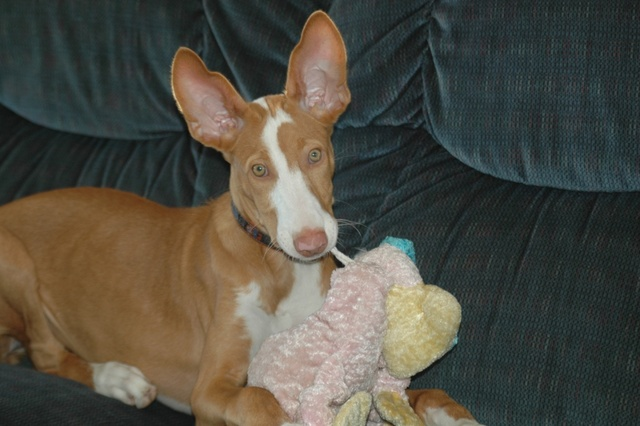

Expected Class: 83
Inference on class: [120] 


Display Image:


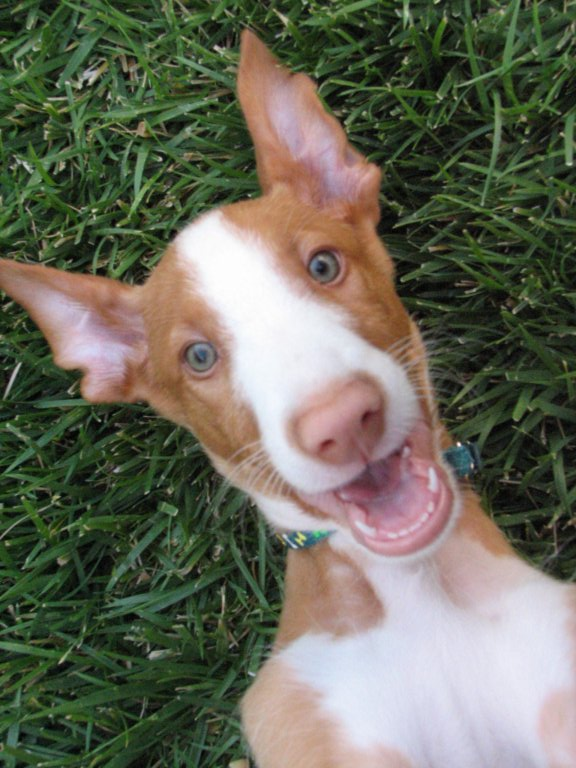

Expected Class: 83
Inference on class: [83] 


Display Image:


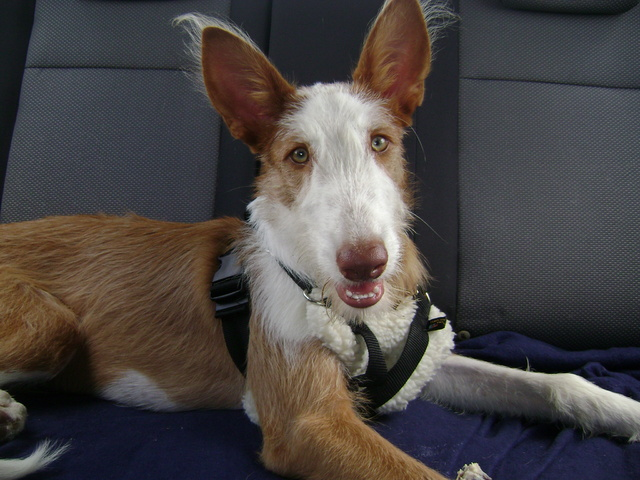

Expected Class: 83
Inference on class: [83] 




In [20]:
from PIL import Image
import io
import os
import numpy as np

test_dir = "project/dogImages/test/083.Ibizan_hound/"
test_images = ["Ibizan_hound_05688.jpg", "Ibizan_hound_05697.jpg", "Ibizan_hound_05679.jpg"]
test_images_expected_output = 83

for index in range(len(test_images)):
    
    test_image = test_images[index]
    test_file_path = os.path.join(test_dir, test_image) 
    
    with open(test_file_path , "rb") as f:
        payload = f.read()
        print("Display Image:")
        display(Image.open(io.BytesIO(payload)))
        print(f"Expected Class: {test_images_expected_output}")
        response = predictor.predict(payload, initial_args={"ContentType": "image/jpeg"}) 
        predicted_dog_breed = np.argmax(response, 1) + 1
        print(f"Inference on class: {predicted_dog_breed} \n\n")

In [21]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()